# <span style='color:Gray'> <span style='font-family:Georgia'> Predicting insurance charges : Data cleaning 
  </span> 

---
<div style="position: relative; height: 50px;">
 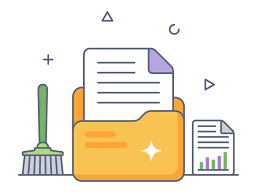


</div>

<div>

## <span style='color: Orange'> <span style='font-family:Georgia'> Overview
</div>

- [<span style='color: White'> <span style='font-family:Georgia'>Case study presentation </span>](#presentation)
- [<span style='color: White'> <span style='font-family:Georgia'>Uploading the data</span>](#load-id)
- [<span style='color: White'> <span style='font-family:Georgia'>Cleaaning and evaluating  the data</span>](#cleanse-id) 



 

## <span id="presentation"> <span style='color:Orange'> <span style='font-family:Georgia'> 1. Case Study Presentation </span> 

Assur'Aimant is a French company that wishes to expand its businness to the USA. The company would like to be advised by IA experts which can help them to estimate the charges of insurance. 
After a market study we have been able to extract a dataset that we'll be using for modelisation. 

---------------------------------------------

 **The Data Set** 



 | BMI | Sex | Age | Children | Smoker | Region | Charges| 
 |-----|-----|-----|----------|--------|--------|--------|

 Where: 

 - **Body Mass Index (BMI) :**  Provides a ratio between height and weight. Ideally, it should be between 18.5 and 24.9.
 - **Gender (Sex) :**  The gender of the person purchasing the insurance (male or female).
 - **Age  :** The age of the primary beneficiary. 
 - **Children  :**  The number of children covered by the insurance 
 - **Smoker  :**  Indicates whether the individual is a smoker or a non-smoker 
 - **Region  :**  The geographical area or location 
 - **Charges  :**  The cost or expenses covered by the insurance. (Our target variable)

## <span id="load-id"> <span style='color: Orange'> <span style='font-family:Georgia'> 2. Data Upload

In [1]:
# Loading the necessary libraries 

#Data manipulation
import pandas as pd 
import numpy as np 

#Dataviz 
import matplotlib.pyplot as plt 
import missingno as msno


In [2]:
#Importing the dataset containg the insurance information and visualizing said dataset
df=pd.read_csv("Dataset.csv")
print("The data set has :"+str(df.shape[0])+" number of rows and "+str(df.shape[1])+ " number of columns ")
print("")
print(df.head(2))#small preview of our dataset

The data set has :1338 number of rows and 7 number of columns 

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523


## <span id="cleanse-id"> <span style='color: Orange'> <span style='font-family:Georgia'> 3. Cleaning and preparing the data

### <span style='color:White'> <span style='font-family:Georgia'> 3.1 Finding missin (null) values 
  

In [3]:

# Calculate the percentage of missing values per row
missing=df.isna().sum()


if missing.sum()==0:
     print("There are not missing values to be shown")
else:
    msno.heatmap(df)
    plt.title('Missing Data Heatmap', fontsize=16)
    plt.figure(figsize=(12, 8))  # Adjust the size to suit your data
    plt.show()



There are not missing values to be shown


### <span style='color:White'> <span style='font-family:Georgia'> 3.2 Finding duplicates 

In [4]:
#Finding duplicates 


num_duplicates = df.duplicated().sum() #To filter the dataset containing missing values
duplicate_rows = df[df.duplicated()]
print("The number of duplicate rows is equal to : {} \n\nDuplicate rows : \n\n{}".format(num_duplicates,duplicate_rows) )
print("")


#Dropping the duplicates 
df.drop_duplicates(inplace=True)

print("Our data set now has {}: number of rows".format(df.shape[0]))

The number of duplicate rows is equal to : 1 

Duplicate rows : 

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

Our data set now has 1337: number of rows


### <span style='color:White'> <span style='font-family:Georgia'> 3.2 Cleaning the categorical variables

In [5]:

#cleaning my categorical variables
categorical_columns = ['sex', 'smoker', 'region']

# Setting a loop to clean my categorical columns by using .strip()
for col in categorical_columns:
    df[col] = df[col].str.strip()

#Checking the data types and unique values to verify that my data is completely cleaned
print(df.dtypes)
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
Unique values in sex: ['female' 'male']
Unique values in smoker: ['yes' 'no']
Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']


### <span style='color:White'> <span style='font-family:Georgia'> 3.2 Exporting our cleaned data

In [6]:
df.to_pickle('exp_data.pkl')